# Loading the data


In [2]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_top_100 = pd.read_csv('/content/drive/MyDrive/2024_spotify_top_100_cleaned.csv')
df_30000_songs = pd.read_csv('/content/drive/MyDrive/spotify_songs_cleaned_V1 (1).csv')

# Data Exploration


In [6]:
df_top_100.shape

(100, 21)

In [7]:
df_30000_songs.shape

(32833, 23)

In [8]:
print(df_top_100.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_name', 'track_album_release_year', 'duration_min',
       'genres', 'record_label', 'danceability', 'energy', 'key_name',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')


In [9]:
print(df_30000_songs.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_year',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key_name', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


In [10]:
df_top_100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  100 non-null    object 
 1   track_name                100 non-null    object 
 2   track_artist              100 non-null    object 
 3   track_popularity          100 non-null    int64  
 4   track_album_name          100 non-null    object 
 5   track_album_release_year  100 non-null    int64  
 6   duration_min              100 non-null    float64
 7   genres                    100 non-null    object 
 8   record_label              100 non-null    object 
 9   danceability              100 non-null    object 
 10  energy                    100 non-null    object 
 11  key_name                  100 non-null    object 
 12  loudness                  100 non-null    float64
 13  mode                      100 non-null    object 
 14  speechiness

In [11]:
df_30000_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_year  32833 non-null  int64  
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  object 
 12  energy                    32833 non-null  object 
 13  key_name                  32833 non-null  object 
 14  loudne

# Data Cleaning

In [12]:
for feature in ["valence", "danceability", "loudness", "energy", "acousticness", "instrumentalness", "liveness", "speechiness"]:
  df_top_100[feature] = df_top_100[feature].astype(str).str.replace('%', '').str.replace(',', '.')

  df_top_100[feature] = pd.to_numeric(df_top_100[feature], errors='coerce')

In [13]:
df_top_100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  100 non-null    object 
 1   track_name                100 non-null    object 
 2   track_artist              100 non-null    object 
 3   track_popularity          100 non-null    int64  
 4   track_album_name          100 non-null    object 
 5   track_album_release_year  100 non-null    int64  
 6   duration_min              100 non-null    float64
 7   genres                    100 non-null    object 
 8   record_label              100 non-null    object 
 9   danceability              100 non-null    float64
 10  energy                    100 non-null    float64
 11  key_name                  100 non-null    object 
 12  loudness                  100 non-null    float64
 13  mode                      100 non-null    object 
 14  speechiness

In [14]:
for feature in ["valence", "danceability", "loudness", "energy", "acousticness", "instrumentalness", "liveness", "speechiness"]:
  df_30000_songs[feature] = df_30000_songs[feature].astype(str).str.replace('%', '').str.replace(',', '.')

  df_30000_songs[feature] = pd.to_numeric(df_30000_songs[feature], errors='coerce')

In [15]:
df_30000_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_year  32833 non-null  int64  
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key_name                  32833 non-null  object 
 14  loudne

# Musical Features Exploration

# Genres Comparison


In [16]:
# Compute the sorted counts for the first DataFrame
sorted_counts_top_100 = df_top_100["genres"].value_counts().sort_values(ascending=False)
sorted_genres_top_100 = sorted_counts_top_100.index.tolist()

# Compute the sorted counts for the second DataFrame
sorted_counts_30000_songs = df_30000_songs["playlist_genre"].value_counts().sort_values(ascending=False)
sorted_genres_30000_songs = sorted_counts_30000_songs.index.tolist()

# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("Top 100 Genres Count", "30000 Songs Genres Count"))

# Create first bar chart (sorted) and add it to the first column
fig_top_100 = px.bar(
    x=sorted_genres_top_100,
    y=sorted_counts_top_100,
    title="Genres Count for Top 100",
    labels={'x': 'Genres', 'y': 'Count'}
)
for trace in fig_top_100['data']:
    fig.add_trace(trace, row=1, col=1)

# Create second bar chart (sorted) and add it to the second column
fig_30000_songs = px.bar(
    x=sorted_genres_30000_songs,
    y=sorted_counts_30000_songs,
    title="Genres Count for 30000 Songs",
    labels={'x': 'Genres', 'y': 'Count'}
)
for trace in fig_30000_songs['data']:
    fig.add_trace(trace, row=1, col=2)

# Update layout to fit the titles and adjust the appearance
fig.update_layout(title_text="Comparison of Genres Count (Sorted by Count)", showlegend=False)

# Show the combined plot
fig.show()

# Artist

In [17]:
# Group and sort by artist for the Obama dataset
grouped_by_artist_top_100 = df_top_100.groupby("track_artist").count()
top_artists_top_100 = grouped_by_artist_top_100.sort_values("track_name", ascending=False).head(20)

# Group and sort by artist for the Top 100 dataset
grouped_by_artist_30000_songs = df_30000_songs.groupby("track_artist").count()
top_artists_30000_songs = grouped_by_artist_30000_songs.sort_values("track_name", ascending=False).head(20)

# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("Top 20 Artists by Track Count (Top 100)", "Top 20 Artists by Track Count (30000 songs)"))

# Create bar chart for the Obama dataset and add to first column
fig_obama = px.bar(
    top_artists_top_100,
    x=top_artists_top_100.index,
    y="track_name",
    title="Top 20 Artists by Track Count (Top 100)",
    labels={'x': 'Artist', 'track_name': 'Track Count'}
)
for trace in fig_obama['data']:
    fig.add_trace(trace, row=1, col=1)

# Create bar chart for the Top 100 dataset and add to second column
fig_top_100 = px.bar(
    top_artists_30000_songs,
    x=top_artists_30000_songs.index,
    y="track_name",
    title="Top 20 Artists by Track Count (30000 songs)",
    labels={'x': 'Artist', 'track_name': 'Track Count'}
)
for trace in fig_top_100['data']:
    fig.add_trace(trace, row=1, col=2)

# Update layout for better readability and set y-axis range for the second plot
fig.update_layout(
    title_text="Top 20 Artists by Track Count Comparison",
    showlegend=False,
    xaxis_tickangle=-45,
    xaxis2_tickangle=-45,
    yaxis2_range=[0, 8.5]  # Sets the y-axis range for the second plot (30 000 songs dataset) to go up to 8
)

# Show the combined plot
fig.show()

In [18]:
print("The oldest song in the Top 100 streamed songs on Spotify as of 2024 is from the year",df_top_100["track_album_release_year"].min())
print("The oldest song in the 30000 songs playlists is from the year",df_30000_songs["track_album_release_year"].min())

The oldest song in the Top 100 streamed songs on Spotify as of 2024 is from the year 1905
The oldest song in the 30000 songs playlists is from the year 1957


In [19]:
df_top_100[df_top_100["track_album_release_year"] == 1905]

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_year,duration_min,genres,record_label,danceability,...,key_name,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
51,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,The Killers,85,Hot Fuss,1905,3.72,Rock,Island Records,35.2,...,C#,-5.23,Major,7.47,0.12,0.0,9.95,23.6,148.03,4
77,60a0Rd6pjrkxjPbaKzXjfq,In the End,Linkin Park,87,Hybrid Theory (Bonus Edition),1905,3.61,Rap,Warner Records,55.6,...,D#,-5.87,Minor,5.84,0.96,0.0,20.90,40.0,105.14,4


In [20]:
df_top_100.loc[df_top_100["track_name"] == "Mr. Brightside", "track_album_release_year"] = 2004
df_top_100.loc[df_top_100["track_name"] == "In the End", "track_album_release_year"] = 2000

In [21]:
df_top_100[df_top_100["track_album_release_year"] == 1978]

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_year,duration_min,genres,record_label,danceability,...,key_name,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
87,5T8EDUDqKcs6OSOwEsfqG7,Don't Stop Me Now - Remastered 2011,Queen,81,Jazz (2011 Remaster),1978,3.49,Rock,EMI,55.9,...,F,-5.276,Major,17.0,4.75,0.02,77.6,60.9,156.3,4


In [22]:
df_30000_songs[df_30000_songs["track_album_release_year"] == 1957]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_year,playlist_name,playlist_id,playlist_genre,...,key_name,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
13408,6qb0O5HW7H4q6R0AbP38Ko,Long Tall Sally (The Thing),Little Richard,1,4CfyfJWb1HSabAjdcLeThs,Here's Little Richard [Remastered & Expanded],1957,Blues Rock,56dbowk1V5ycS5jW7DSvi5,rock,...,F,-5.023,Major,9.73,76.8,0.0,8.41,91.7,184,131853
22723,7DJsL4jyXA39GDiHFQYQ0t,Mess Around,Ray Charles,59,0cw6Sv7IwZ87aLPPvNPSd0,"Ray Charles (aka: Hallelujah, I Love Her So)",1957,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,1S7BckuYIkEazeNKOSM0uA,r&b,...,G#,-2.981,Major,6.40,43.7,0.0,5.60,90.6,149,160227


In [23]:
print("Average track popularity for 30000 songs playlist: ", round(df_30000_songs["track_popularity"].mean(),2))
print("Average track popularity for the top 100 streamed songs as of 2024: ", round(df_top_100["track_popularity"].mean(),2))

print("")

print("Median track popularity for 30000 songs playlist: ", round(df_30000_songs["track_popularity"].median(),2))
print("Median track popularity for the top 100 streamed songs as of 2024: ", round(df_top_100["track_popularity"].median(),2))

print("")

print("Max track popularity for 30000 songs playlist: ", round(df_30000_songs["track_popularity"].max(),2))
print("Max track popularity for the top 100 streamed songs as of 2024: ", round(df_top_100["track_popularity"].max(),2))

print("")

print("Min track popularity for 30000 songs playlist: ", round(df_30000_songs["track_popularity"].min(),2))
print("Min track popularity for the top 100 streamed songs as of 2024: ", round(df_top_100["track_popularity"].min(),2))


Average track popularity for 30000 songs playlist:  42.48
Average track popularity for the top 100 streamed songs as of 2024:  81.05

Median track popularity for 30000 songs playlist:  45.0
Median track popularity for the top 100 streamed songs as of 2024:  82.0

Max track popularity for 30000 songs playlist:  100
Max track popularity for the top 100 streamed songs as of 2024:  90

Min track popularity for 30000 songs playlist:  0
Min track popularity for the top 100 streamed songs as of 2024:  52


In [24]:
df_30000_songs['duration_min'] = df_30000_songs['duration_ms'] / 60000

# Check the first few rows to confirm the new column
df_30000_songs[['duration_ms', 'duration_min']].head()

,duration_ms,duration_min
0,194754,3.245900
1,162600,2.710000
2,176616,2.943600
3,169093,2.818217
4,189052,3.150867


In [25]:
print("Average track duration for 30000 songs playlist: ", round(df_30000_songs["duration_min"].mean(),2))
print("Average track duration for the top 100 streamed songs as of 2024: ", round(df_top_100["duration_min"].mean(),2))

print("")

print("Standard deviation of track duration for 30000 songs playlist: ", round(df_30000_songs["duration_min"].std(),2))
print("Standard deviation of track duration for the  top 100 streamed songs as of 2024: ", round(df_top_100["duration_min"].std(),2))

print("")

print("Median track duration for 30000 songs playlist: ", round(df_30000_songs["duration_min"].median(),2))
print("Median track duration for the top 100 streamed songs as of 2024: ", round(df_top_100["duration_min"].median(),2))

print("")

print("Max track duration for 30000 songs playlist: ", round(df_30000_songs["duration_min"].max(),2))
print("Max track duration for the top 100 streamed songs as of 2024: ", round(df_top_100["duration_min"].max(),2))

print("")

print("Min track duration for 30000 songs playlist: ", round(df_30000_songs["duration_min"].min(),2))
print("Min track duration for the top 100 streamed songs as of 2024: ", round(df_top_100["duration_min"].min(),2))

Average track duration for 30000 songs playlist:  3.76
Average track duration for the top 100 streamed songs as of 2024:  3.71

Standard deviation of track duration for 30000 songs playlist:  1.0
Standard deviation of track duration for the  top 100 streamed songs as of 2024:  0.69

Median track duration for 30000 songs playlist:  3.6
Median track duration for the top 100 streamed songs as of 2024:  3.58

Max track duration for 30000 songs playlist:  8.63
Max track duration for the top 100 streamed songs as of 2024:  5.92

Min track duration for 30000 songs playlist:  0.07
Min track duration for the top 100 streamed songs as of 2024:  1.99


# Music and Sonic Features

# Valence

In [26]:
print("Average track valence for 30000 songs playlist: ",round(df_30000_songs["valence"].mean(),2),"%.")
print("Average track valence for the top 100 streamed songs as of 2024: ",round(df_top_100["valence"].mean(),2),"%.")

Average track valence for 30000 songs playlist:  51.06 %.
Average track valence for the top 100 streamed songs as of 2024:  48.91 %.


# Danceability

In [27]:
print("Average track danceability for 30000 songs playlist: ",round(df_30000_songs["danceability"].mean(),2),"%.")
print("Average track danceability for the 100 streamed songs as of 2024: ",round(df_top_100["danceability"].mean(),2),"%.")

Average track danceability for 30000 songs playlist:  65.48 %.
Average track danceability for the 100 streamed songs as of 2024:  63.81 %.


## Energy

In [28]:
print("Average track energy for 30000 songs playlist: ",round(df_30000_songs["energy"].mean(),2),"%.")
print("Average track energy for the top 100 streamed songs as of 2024: ",round(df_top_100["energy"].mean(),2),"%.")

Average track energy for 30000 songs playlist:  69.86 %.
Average track energy for the top 100 streamed songs as of 2024:  62.74 %.


# Loudness

In [29]:
print("Average track loudness for 30000 songs playlist: ",round(df_30000_songs["loudness"].mean(),2),"dB.")
print("Average track loudness for the top 100 streamed songs as of 2024: ",round(df_top_100["loudness"].mean(),2),"dB.")

Average track loudness for 30000 songs playlist:  -6.72 dB.
Average track loudness for the top 100 streamed songs as of 2024:  -6.2 dB.


# Speechiness

In [30]:
print("Average track speechiness for 30000 songs playlist: ",round(df_30000_songs["speechiness"].mean(),2),"%.")
print("Average track speechiness for the top 100 streamed songs as of 2024: ",round(df_top_100["speechiness"].mean(),2),"%.")

Average track speechiness for 30000 songs playlist:  10.71 %.
Average track speechiness for the top 100 streamed songs as of 2024:  8.59 %.


# Instrumentalness

In [31]:
print("Average track instrumentalness for 30000 songs playlist: ",round(df_30000_songs["instrumentalness"].mean(),2),"%.")
print("Average track instrumentalness for the top 100 streamed songs as of 2024: ",round(df_top_100["instrumentalness"].mean(),2),"%.")

Average track instrumentalness for 30000 songs playlist:  8.47 %.
Average track instrumentalness for the top 100 streamed songs as of 2024:  0.77 %.


# Acousticness

In [32]:
print("Average track acousticness for 30000 songs playlist: ",round(df_30000_songs["acousticness"].mean(),2),"%.")
print("Average track acousticness for the top 100 streamed songs as of 2024: ",round(df_top_100["acousticness"].mean(),2),"%.")

Average track acousticness for 30000 songs playlist:  17.53 %.
Average track acousticness for the top 100 streamed songs as of 2024:  25.32 %.


# Liveness

In [33]:
print("Average track liveness for 30000 songs playlist: ",round(df_30000_songs["liveness"].mean(),2),"%.")
print("Average track liveness for the top 100 streamed songs as of 2024: ",round(df_top_100["liveness"].mean(),2),"%.")

Average track liveness for 30000 songs playlist:  19.02 %.
Average track liveness for the top 100 streamed songs as of 2024:  16.1 %.


In [34]:
# Compute the mode counts for both DataFrames
Spotify_30000_songs_mode = df_30000_songs["mode"].value_counts(normalize=True).rename("30000_songs")
top_100_mode = df_top_100["mode"].value_counts(normalize=True).rename("Top 100")

# Combine both counts into a single DataFrame
combined_mode = pd.concat([Spotify_30000_songs_mode, top_100_mode], axis=1)

# Fill NaN values with 0 if some time signatures don't appear in both datasets
combined_mode = combined_mode.fillna(0)

# Convert ratios to percentages and round to the nearest integer
combined_mode = combined_mode * 100
combined_mode = combined_mode.round(0).astype(int)

# Display the combined table with ratios
print(combined_mode)

       30000_songs  Top 100
mode                       
Major           57       65
minor           43        0
Minor            0       35


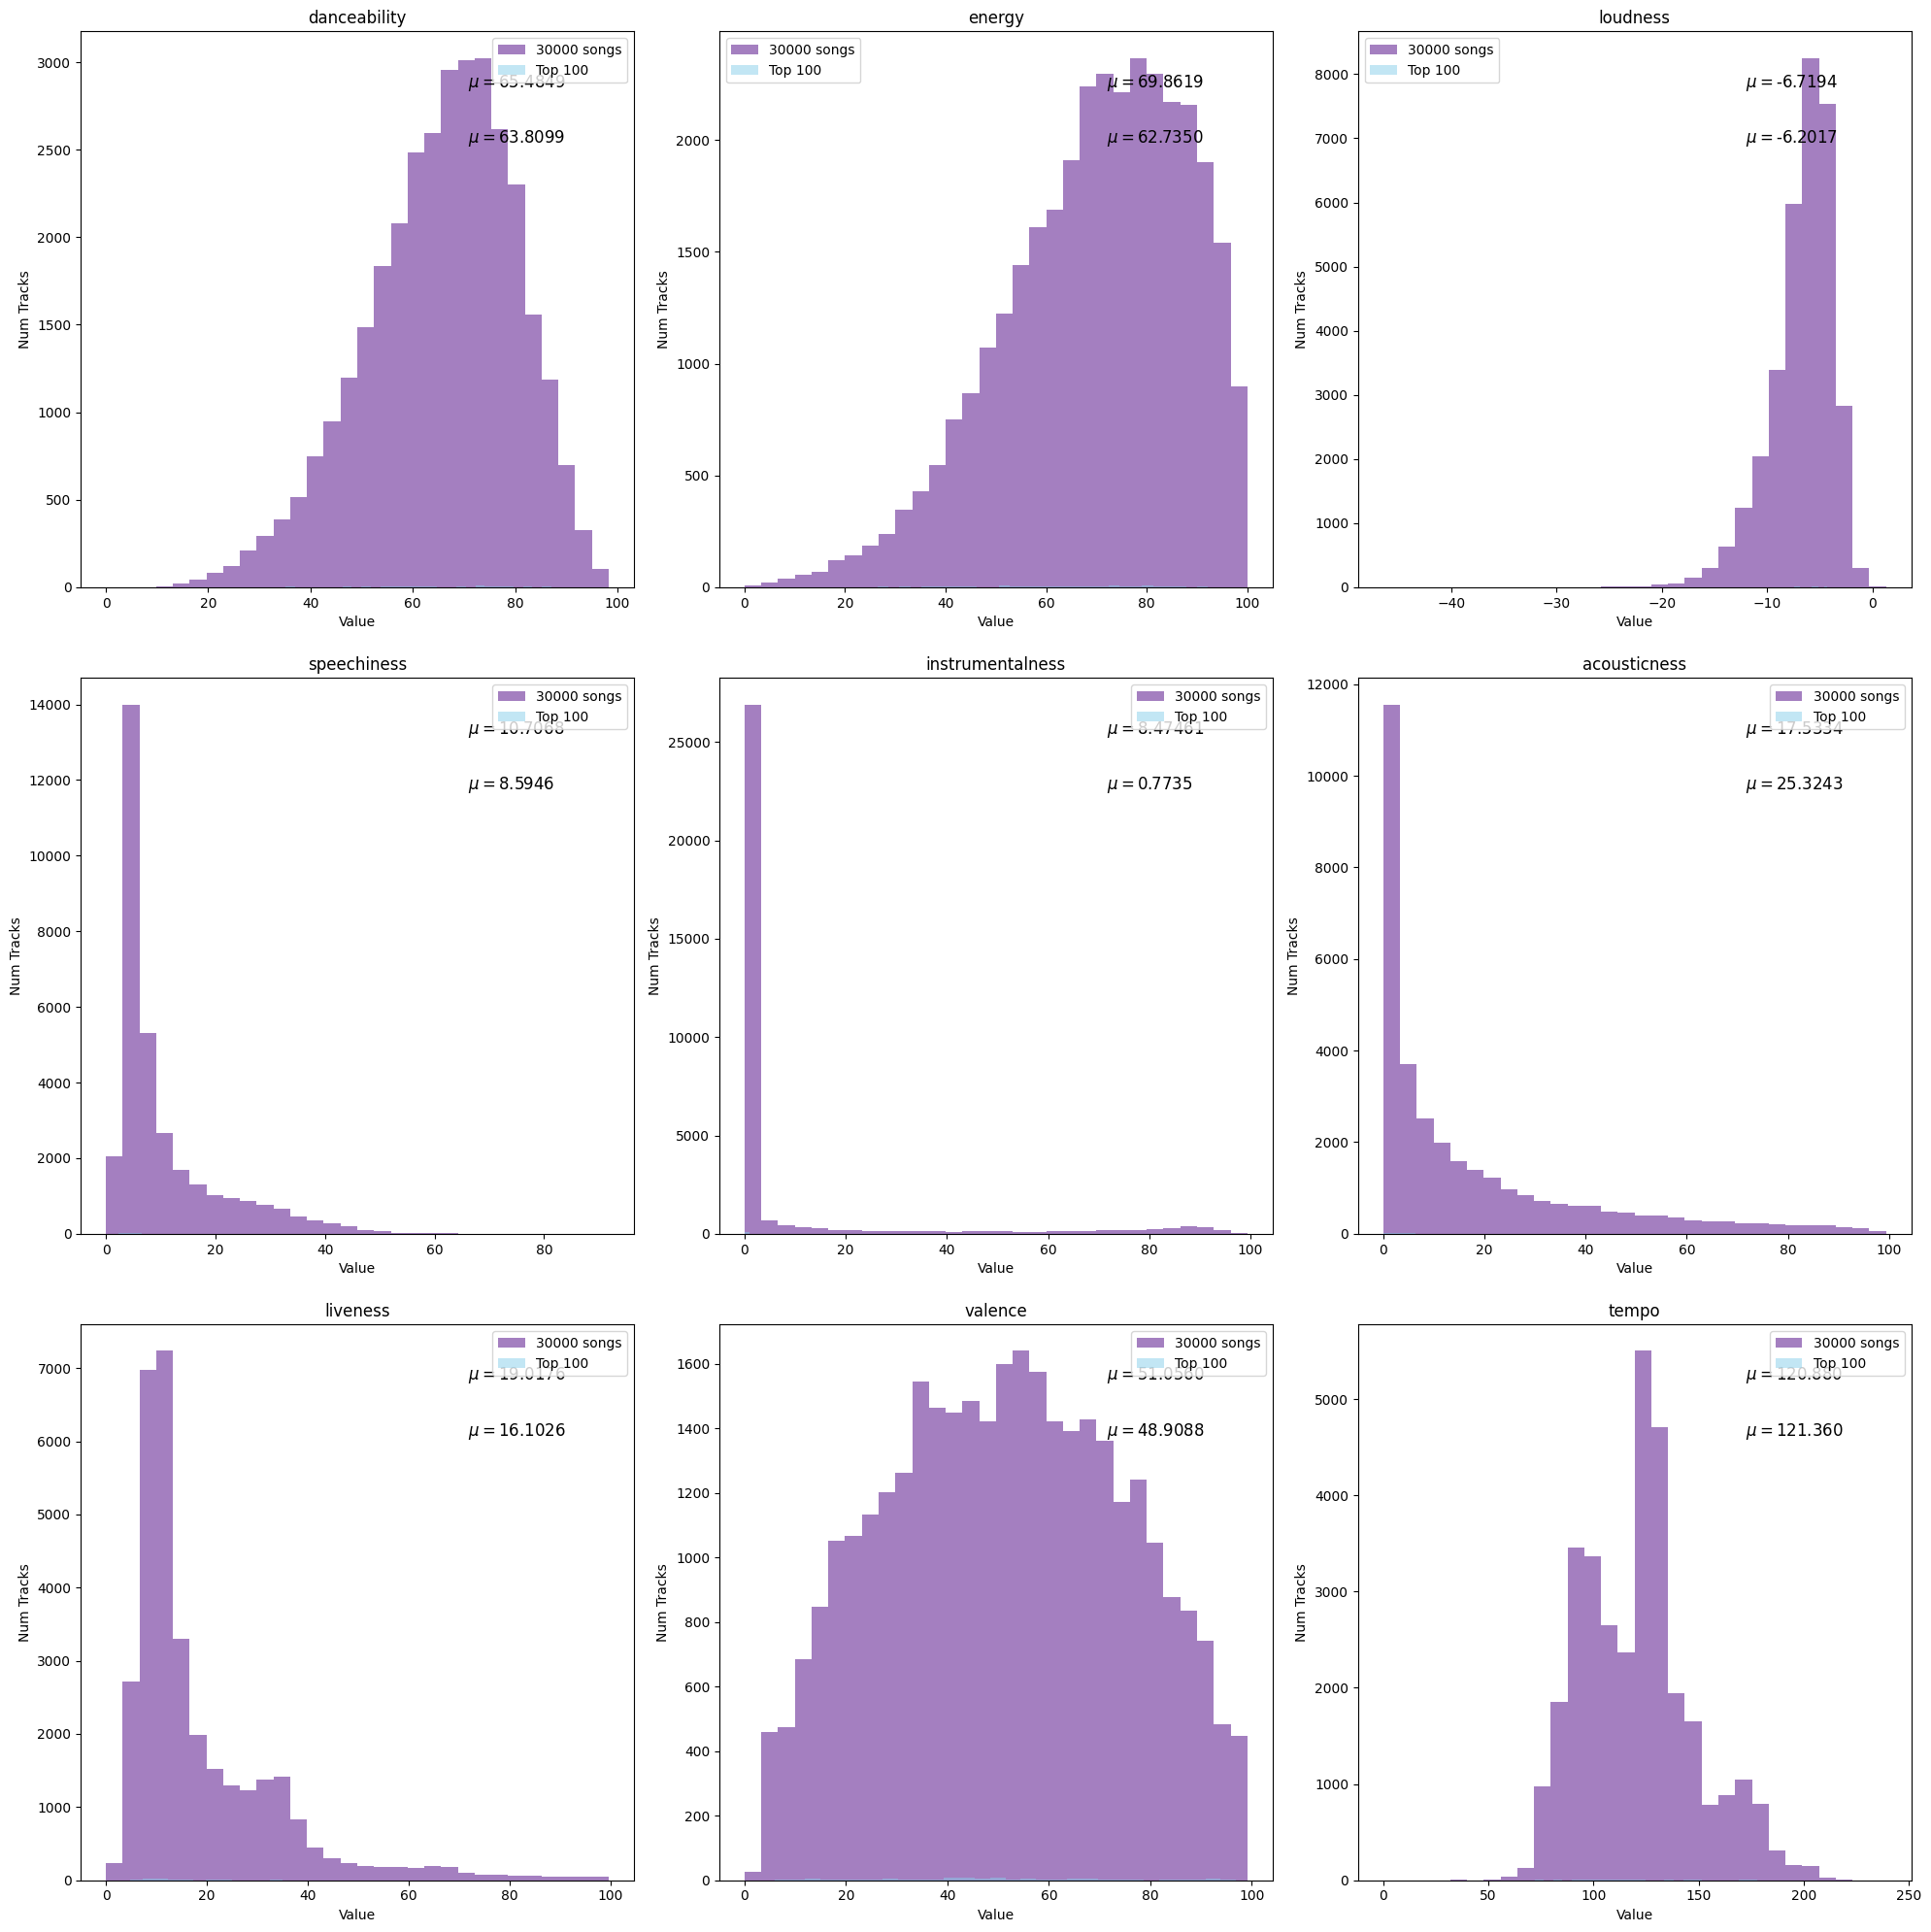

In [36]:
plt.figure(figsize=(20, 20))

# Overlay histograms for each category
for i, category in enumerate(['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'acousticness', 'liveness', 'valence', 'tempo']):
    plt.subplot(3, 3, i + 1)

    # Plot the 30000 songs dataset histogram with transparency
    plt.hist(df_30000_songs[category], bins=30, alpha=0.5, label='30000 songs', color='indigo')

    # Plot the Top 100 dataset histogram with transparency
    plt.hist(df_top_100[category], bins=30, alpha=0.5, label='Top 100', color='skyblue')

    # Display the mean for 30000 songs dataset
    plt.text(plt.xlim()[1] - (plt.xlim()[1] - plt.xlim()[0]) * 0.3,
             plt.ylim()[1] * 0.9, r'$\mu=$' + str(df_30000_songs[category].mean())[:7], fontsize=12)

    # Display the mean for Top 100 dataset
    plt.text(plt.xlim()[1] - (plt.xlim()[1] - plt.xlim()[0]) * 0.3,
             plt.ylim()[1] * 0.8, r'$\mu=$' + str(df_top_100[category].mean())[:7], fontsize=12)

    plt.xlabel('Value')
    plt.ylabel('Num Tracks')
    plt.title(category)
    plt.legend()

# Adjust layout
plt.tight_layout(h_pad=2)
plt.show()

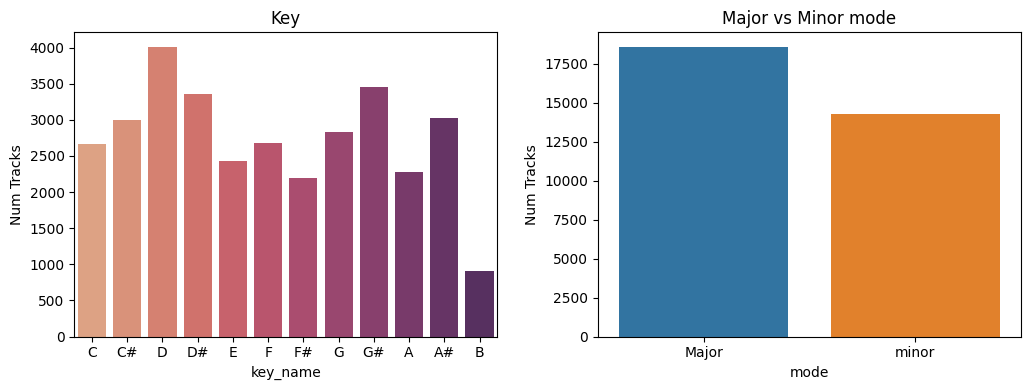

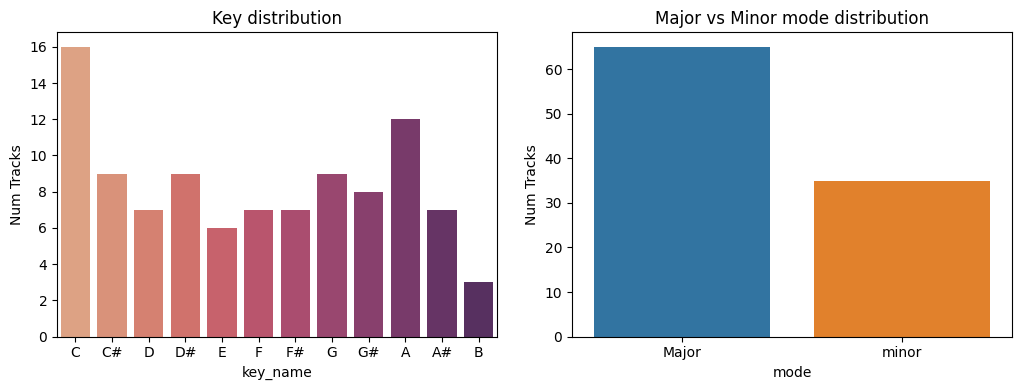

In [38]:
plt.figure(figsize=(15, 4))


plt.subplot(1, 3, 2)
sns.countplot(df_30000_songs, x='key_name', hue='key_name', palette='flare', legend=False)
plt.xticks(ticks=plt.xticks()[0], labels=['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.ylabel('Num Tracks')
plt.title('Key')

plt.subplot(1, 3, 3)
sns.countplot(df_30000_songs, x='mode', hue='mode', legend=False)
plt.xticks(ticks=plt.xticks()[0], labels=['Major', 'minor'])
plt.ylabel('Num Tracks')
plt.title('Major vs Minor mode')

plt.tight_layout(w_pad=2)
plt.show()

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 2)
sns.countplot(df_top_100, x='key_name', hue='key_name', palette='flare', legend=False)
plt.xticks(ticks=plt.xticks()[0], labels=['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.ylabel('Num Tracks')
plt.title('Key distribution')

plt.subplot(1, 3, 3)
sns.countplot(df_top_100, x='mode', hue='mode', legend=False)
plt.xticks(ticks=plt.xticks()[0], labels=['Major', 'minor'])
plt.ylabel('Num Tracks')
plt.title('Major vs Minor mode distribution')

plt.tight_layout(w_pad=2)
plt.show()